<a href="https://colab.research.google.com/github/asimn7/DeepLearning/blob/main/Text_processing%2C_Language_Modeling_using_RNN_(LSTM_GRU).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Obtain the imdb review dataset from tensorflow datasets
dataset = tfds.load('imdb_reviews', as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.LUJ4KU_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.LUJ4KU_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.LUJ4KU_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
# Seperate test and train datasets
train_dataset, test_dataset = dataset['train'], dataset['test']


In [4]:
# Split the test and train data into batches of 32
# and shuffling the training set
batch_size = 32
train_dataset = train_dataset.shuffle(10000)
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [41]:
example, label = next(iter(train_dataset))
print('Text:\n', example.numpy()[0])
print('\nLabel: ', label.numpy()[0])

Text:
 b'Maybe it\'s because I looked up the history of the Irish troubles in the 1920s and then the sad Civil War that engulfed the Free State after the signing of the treaty before watching this movie. Anyway, the sudden turn at the end brought tears to my eyes.<br /><br />Victor McLaglen isn\'t as famous today as he was back then, and he should be better remembered. In this film, I think he\'s playing himself as he would have been without his innate talent and brains. For example, the scenes where his buddy in the crowd is challenging men to fight with him is probably quite reminiscent of what McLaglen actually did in earlier years, when he was a world-class bare-knuckles boxer. John Ford is partly responsible for that; the IMDb trivia section shows how he tricked McLaglen into getting a really bad hangover for the trial scene. This director also could bring out a lot in his actors, even without such tricks. Mostly, though, McLaglen is firmly in control, especially when his characte

In [6]:
#building the model
# Using the TextVectorization layer to normalize, split, and map strings
# to integers.
encoder = tf.keras.layers.TextVectorization(max_tokens=10000)
encoder.adapt(train_dataset.map(lambda text, _: text))
# Extracting the vocabulary from the TextVectorization layer.
vocabulary = np.array(encoder.get_vocabulary())
# Encoding a test example and decoding it back.
original_text = example.numpy()[0]
encoded_text = encoder(original_text).numpy()
decoded_text = ' '.join(vocabulary[encoded_text])
print('original: ', original_text)
print('encoded: ', encoded_text)
print('decoded: ', decoded_text)

original:  b'The problem with "The Killer Elite" is that just by seeking this film out, and investing time to watch it, you are putting more effort into the experience than many of its principals did, particularly director Sam Peckinpah.<br /><br />The already volatile Peckinpah was heading into rough weather with this film. According to at least one biographer, this was where he became acquainted with cocaine. Add to that his binge drinking, and it\'s no wonder things fell apart.<br /><br />It\'s a shame, because the concept behind the film is a good one, and the first ten minutes promise much. Mike Locken (James Caan) and George Hansen (Robert Duvall) are private contractors who do a lot of dirty work for the CIA. They move quick, live well, and seem like the best of friends - then something happens to shatter their brotherhood.<br /><br />An opening scene shows them blowing up a building - why exactly we aren\'t told, par for the course in terms of this film\'s murky motivation. But

In [20]:
import tensorflow as tf

# Define the TextVectorization layer
encoder = tf.keras.layers.TextVectorization(
    max_tokens=20000,  # Limit the number of tokens
    output_mode='int',
    output_sequence_length=100  # Define a fixed sequence length
)

# Adapt the TextVectorization layer to your training data
# Assume train_dataset consists of (text, label) pairs, where text is the raw text data
train_texts = train_dataset.map(lambda text, label: text)
encoder.adapt(train_texts)  # This step is crucial to avoid the "Table not initialized" error

# Define the model
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()), output_dim=64, mask_zero=True),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Summary of the model
model.summary()

# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=test_dataset
)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_vectorization_3                 │ ?                           │     0 (unbuilt) │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_9 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_18 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_19 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 286s 342ms/step - accuracy: 0.6887 - loss: 0.5397 - val_accuracy: 0.7901 - val_loss: 0.4148
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 302s 386ms/step - accuracy: 0.8933 - loss: 0.2600 - val_accuracy: 0.8008 - val_loss: 0.4430
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 323s 387ms/step - accuracy: 0.9493 - loss: 0.1325 - val_accuracy: 0.7934 - val_loss: 0.5855
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 286s 341ms/step - accuracy: 0.9797 - loss: 0.0574 - val_accuracy: 0.7873 - val_loss: 0.7740
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 269s 344ms/step - accuracy: 0.9901 - loss: 0.0284 - val_accuracy: 0.7628 - val_loss: 1.2061


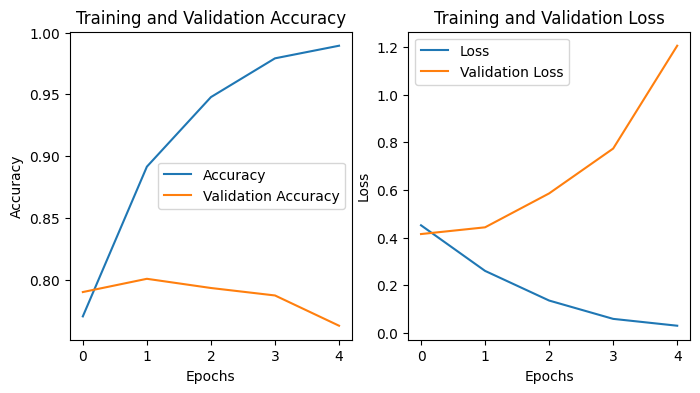

In [21]:
# Plotting the accuracy and loss over time
# Training history
history_dict = history.history
# Seperating validation and training accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
# Seperating validation and training loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']
# Plotting
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])
plt.show()

In [40]:
import numpy as np

# Sample text for prediction
sample_text = ('I would recommend my friends to watch it.')

# Convert the sample text to a NumPy array and reshape it
# to match the expected input shape of the model.
# The TextVectorization layer expects a batch of strings, even if it's just one.
sample_text_array = np.array([sample_text])

# Predict using the NumPy array
predictions = model.predict(sample_text_array)

# Print the prediction score
print("Prediction score:", predictions[0][0])

# Print the label based on the prediction
if predictions[0][0] > 0:
    print('The review is positive')
else:
    print('The review is negative')

ValueError: Invalid dtype: str1312